In [2]:
import pandas as pd
from datetime import datetime

#### Load chat txt file

In [ ]:
chat_path = "Conversa do WhatsApp\Conversa do WhatsApp.txt"

chat = open(chat_path, 'r', encoding='utf-8').read()

#### Parse chat messages as list

In [3]:
msgs = chat.split('\n')

print('Number of messages:', len(msgs))

Number of messages: 52753


#### Process chat txt file

In [4]:
msgs = chat.split('\n')

rows = []
for i, msg in enumerate(msgs):
    if msg:
        msg_split = msg.split(' - ')

        timestamp = None
        if msg[16:19] == ' - ':
            timestamp_string = msg_split[0] + ':00'
            timestamp = datetime.strptime(timestamp_string, "%d/%m/%Y %H:%M:%S")

        msg_body_split = ' - '.join(msg_split[1:]).split(': ')

        user = None
        text = msg_body_split[0]
        if len(msg_body_split) != 1: 
            user = msg_body_split[0]
            text = ': '.join(msg_body_split[1:])
            
        rows.append({'timestamp': timestamp, 'user': user, 'text': text})
    
        print(f'Messages processed: {i + 1}/{len(msgs)}', end='\r')

#### Convert to pandas dataframe 

In [ ]:
df = pd.DataFrame(rows)

df.head()

#### Create date and time fields

In [6]:
df['date'] = df['timestamp'].dt.date
df['time'] = df['timestamp'].dt.time

#### Anonymize user name

In [9]:
anonymize_user = lambda user: 1 if user == 'Luis' else (0 if user == 'hanna' else -1)
df['user'] = df['user'].apply(anonymize_user)

df['user']

0       -1
1        1
2        0
3        1
4        1
        ..
52454    1
52455    1
52456    1
52457    1
52458    1
Name: user, Length: 52459, dtype: int64

#### Anonymize text content

In [10]:
anonymize_user = lambda user: 1 if user == 'Luis' else (0 if user == 'hanna' else -1)
df['text'] = df['text'].apply(len)

df['text']

0        208
1         19
2         19
3         19
4         19
        ... 
52454     30
52455     25
52456     29
52457     19
52458     21
Name: text, Length: 52459, dtype: int64

#### Save chat structured data

In [11]:
csv_path = 'data/chat.csv'

df.to_csv(csv_path, index=False)

print('Chat saved at:', datetime.now())

Chat saved at: 2024-07-03 00:30:56.512127


---
## Exploratory Data Analysis

In [13]:
import pandas as pd

# %matplotlib widget
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

#### Load csv data

In [14]:
csv_path = 'data/chat.csv'

df = pd.read_csv(csv_path)

df['timestamp'] = pd.to_datetime(df['timestamp'])

df.head()

,timestamp,user,text,date,time
0,2023-08-09 16:57:00,-1,208,2023-08-09,16:57:00
1,2023-07-19 14:34:00,1,19,2023-07-19,14:34:00
2,2023-07-19 14:26:00,0,19,2023-07-19,14:26:00
3,2023-07-19 14:46:00,1,19,2023-07-19,14:46:00
4,2023-07-19 14:46:00,1,19,2023-07-19,14:46:00


#### Min and Max dates

In [15]:
df['date'].iloc[[0, -1]]

0        2023-08-09
52458    2024-05-08
Name: date, dtype: object

#### User message count

In [26]:
msg_cnt = df['user'].value_counts().to_frame('Message Count').T
msg_cnt['Total'] = msg_cnt.sum()[0]

msg_cnt.T.loc[[-1, 0, 1, 'Total']]

,Message Count
user,
-1,462
0,22393
1,29604
Total,22393


#### User daily message count

In [27]:
day_msg_cnt = df[['user', 'date']].value_counts().unstack().T
day_msg_cnt['Total'] = day_msg_cnt.sum(axis=1)

day_msg_cnt.head()

user,-1,0,1,Total
date,,,,
2023-07-19,NaN,41.0,45.0,86.0
2023-07-20,NaN,33.0,53.0,86.0
2023-07-21,NaN,33.0,27.0,60.0
2023-07-22,NaN,66.0,72.0,138.0
2023-07-23,NaN,22.0,18.0,40.0


In [ ]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

# Generate some data
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

# Create a plot with interactive features
plt.figure()
plt.plot(x, y)
plt.title('Interactive Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


#### User daily average messages

In [29]:
day_avg = day_msg_cnt.mean().to_frame('Daily Average')

day_avg.round(2)

,Daily Average
user,
-1,1.00
0,81.13
1,108.44
Total,188.40


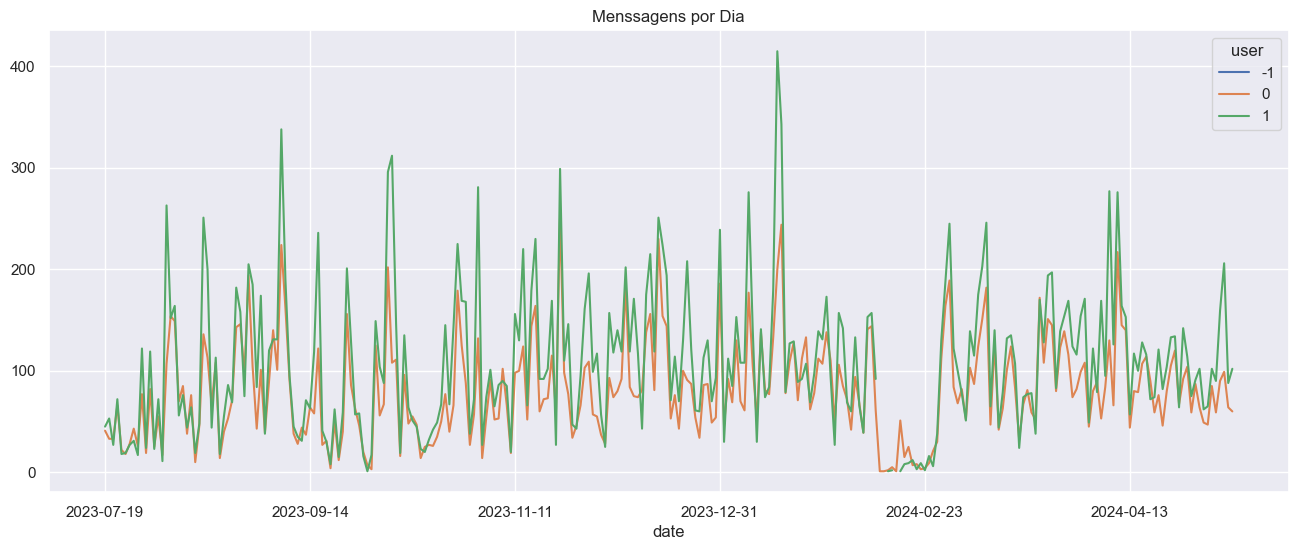

In [31]:
ax = day_msg_cnt.drop('Total', axis=1).plot(figsize=(16, 6), title="Menssagens por Dia")
plt.show()
